In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, plot_confusion_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv("oasis_longitudinal.csv")
data.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [4]:
data.shape

(373, 15)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


In [6]:
data['M/F'] = [1 if each == "M" else 0 for each in data['M/F']]
data['Group'] = [1 if each == "Demented" or each == "Converted" else 0 for each in data['Group']]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    int64  
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    int64  
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(7), object(3)
memory usage: 43.8+ KB


In [7]:
data=data.drop(['Subject ID','MRI ID','Hand'],axis=1)

data.head()

,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,1,0,1,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,0,2,457,1,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,1,1,0,1,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,1,2,560,1,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,1,3,1895,1,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [8]:
correlation_matrix = data.corr()
data_corr = correlation_matrix['Group'].sort_values(ascending=False)
data_corr

Group       1.000000
CDR         0.778049
M/F         0.222146
SES         0.062463
ASF         0.032495
Age        -0.005941
eTIV       -0.042700
Visit      -0.095507
MR Delay   -0.120638
EDUC       -0.193060
nWBV       -0.311346
MMSE       -0.524775
Name: Group, dtype: float64

In [9]:
data.describe()

,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,0.490617,1.882038,595.104558,0.428954,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.500583,0.922843,635.485118,0.495592,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,0.000000,1.000000,0.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,0.000000,1.000000,0.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,0.000000,2.000000,552.000000,0.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,1.000000,2.000000,873.000000,1.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,1.000000,5.000000,2639.000000,1.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [10]:
data.isna().sum()

Group        0
Visit        0
MR Delay     0
M/F          0
Age          0
EDUC         0
SES         19
MMSE         2
CDR          0
eTIV         0
nWBV         0
ASF          0
dtype: int64

In [11]:
median = data['MMSE'].median()
data['MMSE'].fillna(median, inplace=True)
median = data['SES'].median()
data['SES'].fillna(median, inplace=True)
data.isnull().sum()

Group       0
Visit       0
MR Delay    0
M/F         0
Age         0
EDUC        0
SES         0
MMSE        0
CDR         0
eTIV        0
nWBV        0
ASF         0
dtype: int64

In [12]:
y = data['Group'].values
x = data[['M/F', 'SES', 'ASF', 'Age', 'eTIV', 'EDUC', 'nWBV', 'MMSE']]

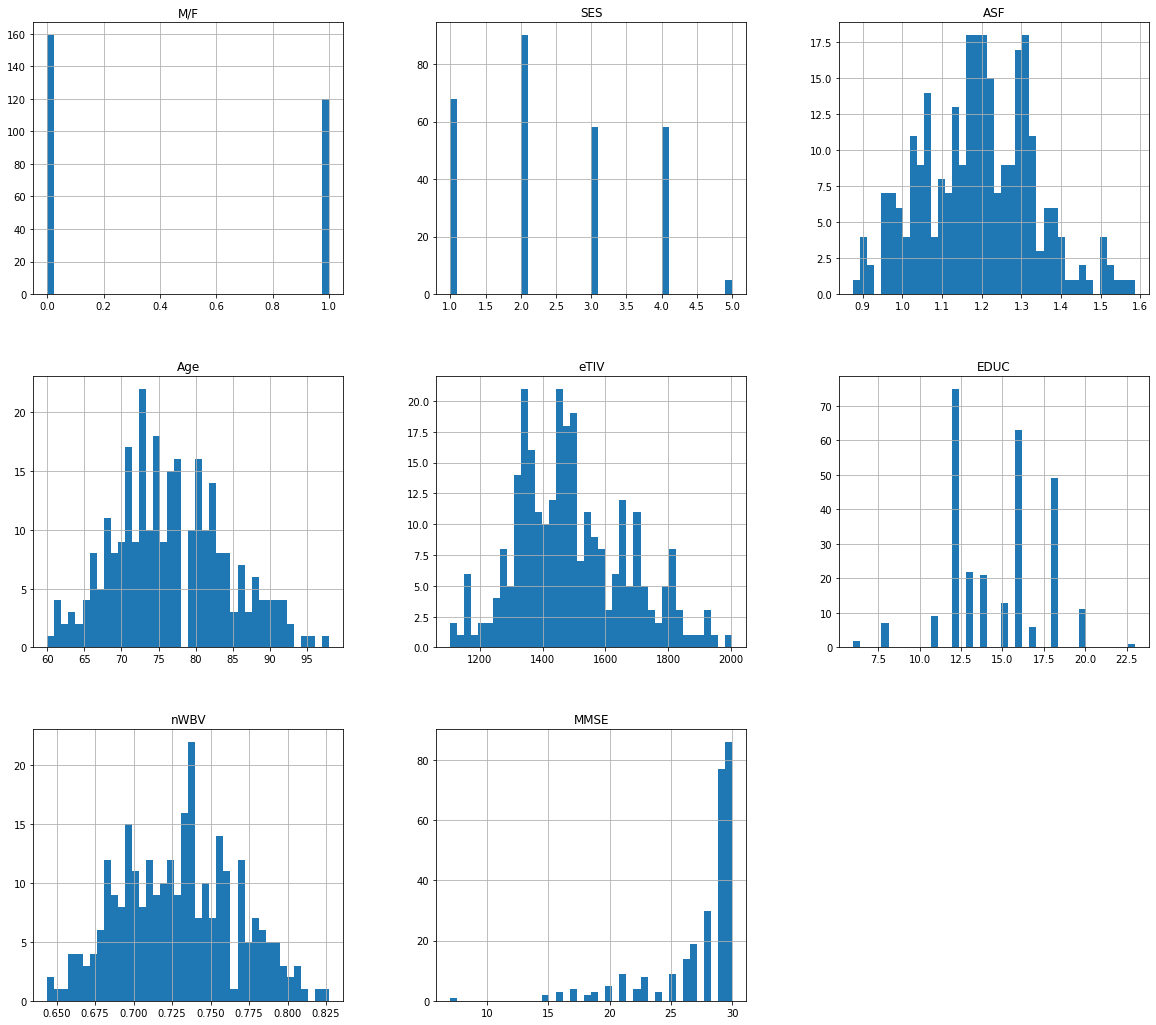

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

x_train.hist(bins=40, figsize=(20, 18))
plt.show()

In [14]:
df_y_train = pd.DataFrame(y_train)
df_y_test = pd.DataFrame(y_test)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [15]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input, Dense, Dropout, LSTM

i = Input(shape=(x_train[0].shape))
x = Dense(10, activation='sigmoid')(i)
x = Dense(256, activation='sigmoid')(x)
x = Dropout(0.2)(x)
x = Dense(28, activation='sigmoid')(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(i,x)
model.compile(optimizer="adam",loss = "binary_crossentropy",metrics = ['accuracy'])

In [16]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 8)]               0         
                                                                 
 dense (Dense)               (None, 10)                90        
                                                                 
 dense_1 (Dense)             (None, 256)               2816      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 28)                7196      
                                                                 
 dense_3 (Dense)             (None, 1)                 29        
                                                                 
Total params: 10,131
Trainable params: 10,131
Non-trainable p

In [23]:
r = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs = 500)

Epoch 1/500
9/9 [==============================] - 0s 9ms/step - loss: 0.3456 - accuracy: 0.8459 - val_loss: 0.4750 - val_accuracy: 0.7447
Epoch 2/500
9/9 [==============================] - 0s 5ms/step - loss: 0.3526 - accuracy: 0.8423 - val_loss: 0.4751 - val_accuracy: 0.7447
Epoch 3/500
9/9 [==============================] - 0s 5ms/step - loss: 0.3459 - accuracy: 0.8495 - val_loss: 0.4565 - val_accuracy: 0.7553
Epoch 4/500
9/9 [==============================] - 0s 7ms/step - loss: 0.3464 - accuracy: 0.8566 - val_loss: 0.4653 - val_accuracy: 0.7766
Epoch 5/500
9/9 [==============================] - 0s 5ms/step - loss: 0.3546 - accuracy: 0.8208 - val_loss: 0.4826 - val_accuracy: 0.7447
Epoch 6/500
9/9 [==============================] - 0s 8ms/step - loss: 0.3540 - accuracy: 0.8315 - val_loss: 0.4728 - val_accuracy: 0.7553
Epoch 7/500
9/9 [==============================] - 0s 5ms/step - loss: 0.3545 - accuracy: 0.8423 - val_loss: 0.4598 - val_accuracy: 0.7766
Epoch 8/500
9/9 [==========

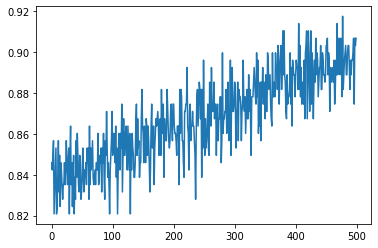

In [24]:
plt.plot(r.history['accuracy'])

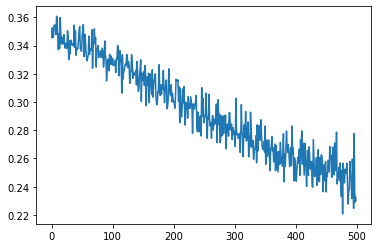

In [25]:
plt.plot(r.history['loss'])

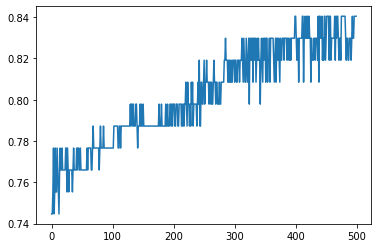

In [26]:
plt.plot(r.history['val_accuracy'])

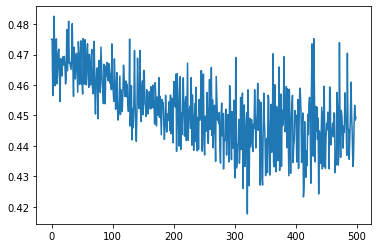

In [27]:
plt.plot(r.history['val_loss'])

In [38]:
model.predict(x_test[[3]])

array([[0.02711627]], dtype=float32)

In [39]:
y_test[[3]]

array([0])

In [46]:
predictions = model.predict(x_test)
prediction_classes = [
    1 if prob > 0.5 else 0 for prob in np.ravel(predictions)
]
print(confusion_matrix(y_test, prediction_classes))

[[41  2]
 [13 38]]


In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print(f'Accuracy: {accuracy_score(y_test, prediction_classes):.2f}')
print(f'Precision: {precision_score(y_test, prediction_classes):.2f}')
print(f'Recall: {recall_score(y_test, prediction_classes):.2f}')

Accuracy: 0.84
Precision: 0.95
Recall: 0.75
